<a href="https://colab.research.google.com/github/AnthonyFl22/Portafolio/blob/main/ClasePortafolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la construcción de un Portafolio de Inversión con Python

En esta clase aprenderemos a construir un portafolio de inversión básico usando Python. Utilizaremos datos reales de acciones descargados desde internet y haremos análisis básico de riesgo y rendimiento. Aunque no se requiere experiencia previa en programación, explicaremos paso a paso cada parte del código.

Los conceptos clave que cubriremos son:
- Cómo obtener datos financieros reales
- Cómo calcular rendimientos de acciones
- Cómo visualizar series de precios y rendimientos
- Cómo evaluar riesgo y retorno
- Cómo construir un portafolio diversificado
- Introducción a la optimización de portafolios


## Paquetes utilizados

Usamos varias librerías en Python para facilitar nuestro análisis:
- `pandas`: para manipular datos en forma de tablas.
- `numpy`: para cálculos matemáticos.
- `matplotlib.pyplot`: para graficar los precios y rendimientos.
- `scipy.optimize`: más adelante para optimizar el portafolio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Cargamos los datos

In [ ]:
path_femsa = "https://raw.githubusercontent.com/AnthonyFl22/Portafolio/main/FEMSA.csv"
path_tesla = "https://raw.githubusercontent.com/AnthonyFl22/Portafolio/main/TESLA.csv"
path_nvidia = "https://raw.githubusercontent.com/AnthonyFl22/Portafolio/main/NVIDIA.csv"
path_sanofi = "https://raw.githubusercontent.com/AnthonyFl22/Portafolio/main/SANOFI.csv"

In [ ]:
df_femsa = pd.read_csv(path_femsa, sep=';')
df_sanofi = pd.read_csv(path_sanofi, sep=';')
df_tesla = pd.read_csv(path_tesla, sep=';')
df_nvidia = pd.read_csv(path_nvidia, sep =';')

dfs = {
    'sanofi': df_sanofi,
    'femsa': df_femsa,
    'tesla': df_tesla,
    'nvidia': df_nvidia
}

empresas = ['sanofi', 'femsa', 'nvidia', 'tesla']

df_femsa

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/5/2025,92.9,94.6,92.6,94.6,94.6,"287,438.0"
1,5/5/2025,93.3,93.9,92.7,92.9,92.9,"144,000.0"
2,2/5/2025,93.5,94.9,93.1,93.6,93.6,"233,100.0"
3,1/5/2025,93.6,93.9,92.6,93.0,93.0,"76,600.0"
4,30/4/2025,93.1,94.5,92.3,94.1,94.1,"266,200.0"
...,...,...,...,...,...,...,...
1252,12/5/2020,40.2,40.9,40.2,40.4,32.7,"171,700.0"
1253,11/5/2020,40.3,40.9,39.8,40.2,32.6,"109,800.0"
1254,8/5/2020,39.0,40.5,39.0,40.3,32.6,"94,700.0"
1255,7/5/2020,39.4,39.5,38.4,38.6,31.2,"650,500.0"


In [ ]:
# df_sanofi['Date'] = pd.to_datetime(df_sanofi['Date'], dayfirst=True)
for name, df in dfs.items():
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
for name, df in dfs.items():
    df.columns = df.columns.str.strip()


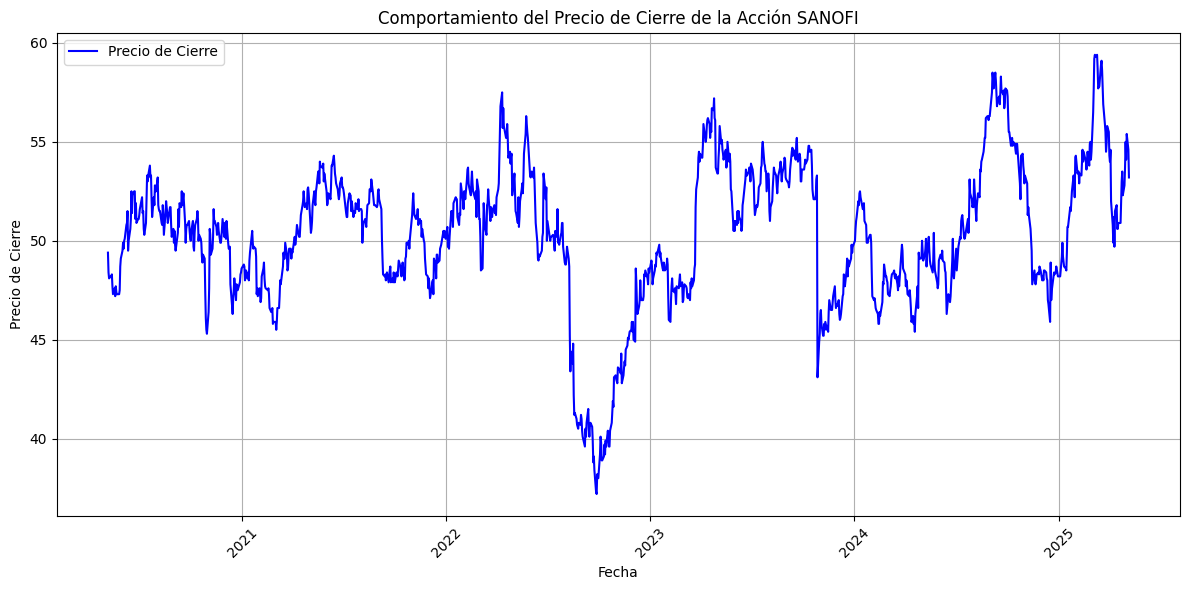

In [ ]:
empresa = "SANOFI"
plt.figure(figsize=(12,6))
plt.plot(df_sanofi['Date'], df_sanofi['Close'], color='blue', label='Precio de Cierre')
plt.title(f'Comportamiento del Precio de Cierre de la Acción {empresa}')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


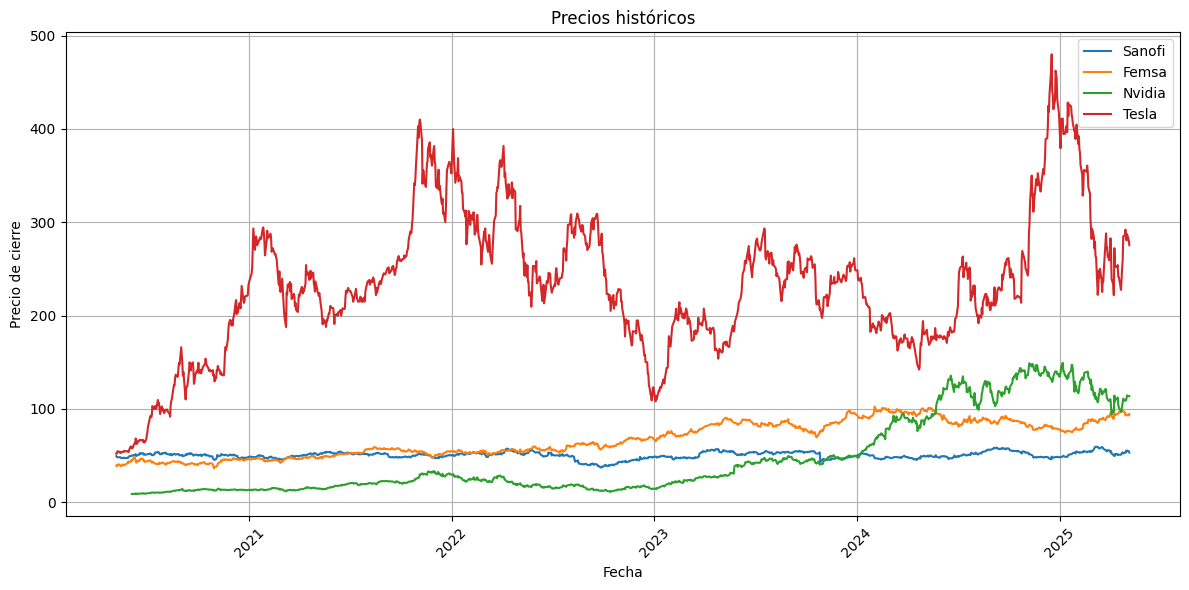

In [ ]:
plt.figure(figsize=(12, 6))
for empresa in empresas:
    df = dfs[empresa]
    plt.plot(df['Date'], df['Close'], label=empresa.capitalize())

plt.title('Precios históricos')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
inv_total = 1_000_000
print(f"Nuestra inversión total es de: ${inv_total:,.2f}\n")
print("Distribución del capital por empresa:\n")

porcentajes = [20, 15, 25, 40]
asignaciones = []

for empresa, porcentaje in zip(empresas, porcentajes):
    capital = inv_total * (porcentaje / 100)
    asignaciones.append(capital)
    print(f"{empresa.capitalize():<10} | {porcentaje:>3}% asignado | Capital: ${capital:,.2f}")

print("\nResumen total:")
print(" + ".join([f"${asig:,.2f}" for asig in asignaciones]) + f" = ${sum(asignaciones):,.2f}")


Nuestra inversión total es de: $1,000,000.00

Distribución del capital por empresa:

Sanofi     |  20% asignado | Capital: $200,000.00
Femsa      |  15% asignado | Capital: $150,000.00
Nvidia     |  25% asignado | Capital: $250,000.00
Tesla      |  40% asignado | Capital: $400,000.00

Resumen total:
$200,000.00 + $150,000.00 + $250,000.00 + $400,000.00 = $1,000,000.00


## ¿Qué es el rendimiento?

El **rendimiento** mide el cambio porcentual en el precio de un activo entre dos periodos:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
$$

Nos indica si una acción ha ganado o perdido valor entre días consecutivos.


### Calculamos los rendimientos diarios

In [ ]:
for name, df in dfs.items():
    df['Rendimientos'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

## Calculamos el valor de cierre promedio por mes:

In [ ]:
# Aseguramos que la columna 'Date' esté en formato datetime y sea el índice
for df in [df_sanofi, df_femsa, df_nvidia, df_tesla]:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)

# Diccionario con los DataFrames
dfs = {
    'sanofi': df_sanofi,
    'femsa': df_femsa,
    'nvidia': df_nvidia,
    'tesla': df_tesla
}

# Diccionario para almacenar promedios mensuales
monthly_averages = {}

# Calcular promedio mensual con frecuencia de inicio de mes ('MS')
for name, df in dfs.items():
    monthly_avg = df['Close'].resample('MS').mean()
    monthly_averages[name] = monthly_avg

# Crear DataFrame de resultados
result_df = pd.DataFrame(monthly_averages)

# Añadir columna de periodos
result_df['Periodos'] = range(1, len(result_df) + 1)

# Reordenar columnas
result_df = result_df[['Periodos'] + list(monthly_averages.keys())]

# Mostrar resultados
print(result_df)


            Periodos     sanofi      femsa      nvidia       tesla
Date                                                              
2020-05-01         1  47.964706  40.347059         NaN   53.964706
2020-06-01         2  50.945455  44.995455    9.155000   64.240909
2020-07-01         3  52.131818  42.340909   10.218182   97.350000
2020-08-01         4  51.366667  42.738095   11.976190  120.033333
2020-09-01         5  50.928571  40.966667   12.771429  137.838095
...              ...        ...        ...         ...         ...
2025-01-01        57  50.800000  76.685000  135.720000  405.025000
2025-02-01        58  53.973684  83.252632  130.357895  343.336842
2025-03-01        59  57.471429  88.633333  114.928571  255.823810
2025-04-01        60  52.142857  94.785714  105.466667  257.161905
2025-05-01        61  54.325000  93.525000  113.350000  280.850000

[61 rows x 5 columns]


## 📈 Rendimiento Esperado

- **¿Qué es?** Promedio de los rendimientos históricos de un activo.
- **¿Para qué se usa?** Estimar cuánto ganará en promedio una inversión.
- **Fórmula:**
  $$
  E(R_i) = \frac{1}{n} \sum_{t=1}^{n} R_{i,t}
  $$


---

## ⚠️ Riesgo Individual (Volatilidad)

- **¿Qué es?** Medida de la variabilidad de los rendimientos (incertidumbre).
- **¿Para qué se usa?** Evaluar qué tan estable o riesgosa es una inversión.
- **Fórmula:**
  $$
  \sigma_i = \sqrt{\frac{1}{n-1} \sum_{t=1}^{n} (R_{i,t} - E(R_i))^2}
  $$
- **Clave:** Cuanto mayor la desviación estándar, mayor el riesgo.


In [ ]:
empresas = ['sanofi', 'femsa', 'nvidia', 'tesla']

# Calcular rendimientos mensuales a partir de precios mensuales
monthly_returns = result_df[empresas].pct_change().dropna()

# Rendimiento esperado y riesgo
expected_returns = monthly_returns.mean()
individual_risks = monthly_returns.std()

# Expresarlo en porcentaje
expected_returns_percentage = expected_returns * 100
individual_risks_percentage = individual_risks * 100

# Mostrar resultados
print("\n📈 Rendimiento esperado (promedio) de cada acción:")
print(expected_returns_percentage.map("{:.2f}%".format))

print("\n⚠️ Riesgo individual (desviación estándar) de cada acción:")
print(individual_risks_percentage.map("{:.2f}%".format))



📈 Rendimiento esperado (promedio) de cada acción:
sanofi    0.25%
femsa     1.37%
nvidia    5.10%
tesla     3.95%
dtype: object

⚠️ Riesgo individual (desviación estándar) de cada acción:
sanofi     5.24%
femsa      4.97%
nvidia    12.72%
tesla     17.84%
dtype: object


## 📊 Cálculo del rendimiento y riesgo del portafolio

- **Rendimiento del portafolio:** se calcula como la suma ponderada de los rendimientos esperados de cada acción, usando sus asignaciones de capital como pesos.
  
$$
  R_p = \sum_{i=1}^n w_i \cdot E(R_i)
$$

- **Riesgo del portafolio:** se obtiene mediante la desviación estándar total considerando la covarianza entre los activos. Es una fórmula cuadrática que incorpora correlaciones:

$$
  \sigma_p = \sqrt{w^T \Sigma w}
$$

- **Ponderaciones:** se calculan dividiendo el capital asignado a cada acción entre el total invertido.

> Este análisis permite conocer el rendimiento promedio esperado y la volatilidad conjunta del portafolio construido.


In [ ]:

# Total invertido (por si acaso)
total_investment = sum(asignaciones)

# Ponderaciones del portafolio (en el mismo orden que la lista de empresas)
weights = np.array(asignaciones) / total_investment

# Rendimiento esperado del portafolio (suma ponderada de rendimientos esperados)
portfolio_return = np.dot(expected_returns[empresas], weights)

# Riesgo total del portafolio usando la matriz de covarianza
cov_matrix = monthly_returns[empresas].cov()
portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Mostrar resultados
print("📈 Rendimiento total del portafolio:")
print("{:.2f}%".format(portfolio_return * 100))

print("\n⚠️ Riesgo total del portafolio:")
print("{:.2f}%".format(portfolio_risk * 100))


📈 Rendimiento total del portafolio:
3.11%

⚠️ Riesgo total del portafolio:
8.41%


## 🔗 Matriz de Covarianzas

- **¿Qué es?** Una matriz que muestra cómo varían conjuntamente los rendimientos de dos activos.
- **¿Para qué se usa?** Para calcular el riesgo total del portafolio, considerando cómo interactúan los activos entre sí.




In [ ]:
# Calcular la matriz de covarianza de los rendimientos
cov_matrix = monthly_returns.cov()

# Mostrar la matriz de covarianza
print("\nMatriz de Covarianza:")
print(cov_matrix)



Matriz de Covarianza:
          sanofi     femsa    nvidia     tesla
sanofi  0.002745  0.000192  0.000054 -0.002099
femsa   0.000192  0.002474 -0.000483 -0.002217
nvidia  0.000054 -0.000483  0.016174  0.007133
tesla  -0.002099 -0.002217  0.007133  0.031811


## 🔗 Matriz de Correlación

- Mide la **relación lineal** entre los rendimientos de dos activos.
- Toma valores entre **-1 y 1**:
  - **1**: correlación perfecta positiva.
  - **0**: sin correlación.
  - **-1**: correlación perfecta negativa.
- Ayuda a identificar qué tan **diversificado** está el portafolio.

En este caso, se basa en los **rendimientos mensuales promedio** de cada acción.


In [ ]:
# Calcular la matriz de correlación de los rendimientos
corr_matrix = monthly_returns.corr()

# Mostrar la matriz de correlación
print("\nMatriz de Correlación:")
print(corr_matrix)


Matriz de Correlación:
          sanofi     femsa    nvidia     tesla
sanofi  1.000000  0.073786  0.008157 -0.224636
femsa   0.073786  1.000000 -0.076301 -0.249942
nvidia  0.008157 -0.076301  1.000000  0.314461
tesla  -0.224636 -0.249942  0.314461  1.000000


## 📈 Frontera Eficiente

- La **frontera eficiente** es el conjunto de portafolios óptimos que ofrecen el **mayor rendimiento esperado posible para cada nivel de riesgo** (o el menor riesgo para un nivel de rendimiento dado).
- Se basa en la **Teoría Moderna de Portafolios** de Harry Markowitz.

### 🔹 ¿Cómo se calcula?
1. Se generan diferentes combinaciones de pesos (asignaciones) entre los activos.
2. Para cada combinación, se calcula:

   **Rendimiento esperado del portafolio:**

   $$
   R_p = \sum_{i=1}^n w_i \cdot E(R_i)
   $$

   **Riesgo total del portafolio:**

   $$
   \sigma_p = \sqrt{w^T \Sigma w}
   $$

3. Se usan técnicas de **optimización matemática** para encontrar los portafolios con el menor riesgo para distintos niveles de rendimiento objetivo.

### 🔹 ¿Para qué sirve?
- Permite visualizar y elegir combinaciones de activos que **maximizan el rendimiento ajustado al riesgo**.
- Ayuda a tomar decisiones racionales de inversión basadas en objetivos y tolerancia al riesgo.

> Cada punto sobre la curva representa un portafolio eficiente con una combinación distinta de activos.


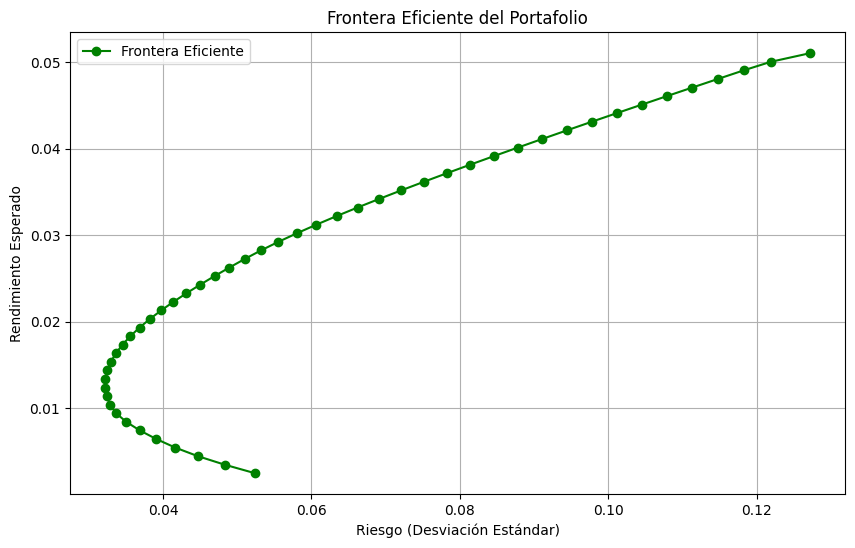

In [ ]:
tickers = empresas

# Función de rendimiento del portafolio
def portfolio_return(weights):
    return np.dot(expected_returns, weights)

# Función de riesgo del portafolio
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Función de optimización: minimizar el riesgo dado un rendimiento objetivo
def minimize_risk(weights, target_return):
    return portfolio_risk(weights)

# Restricciones: pesos deben sumar 1
bounds = tuple((0, 1) for _ in range(len(tickers)))
initial_weights = np.array([1/len(tickers)] * len(tickers))

# Generar la frontera eficiente para un rango de rendimientos objetivo
target_returns = np.linspace(expected_returns.min(), expected_returns.max(), 50)
efficient_portfolios = []

for target in target_returns:
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # pesos suman 1
        {'type': 'eq', 'fun': lambda w: portfolio_return(w) - target}  # rendimiento objetivo
    )
    result = minimize(minimize_risk, initial_weights, args=(target,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_portfolios.append(result)

# Extraer los rendimientos y riesgos de la frontera eficiente
returns = [portfolio_return(p['x']) for p in efficient_portfolios]
risks = [portfolio_risk(p['x']) for p in efficient_portfolios]

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.plot(risks, returns, 'g-', marker='o', label='Frontera Eficiente')
plt.xlabel('Riesgo (Desviación Estándar)')
plt.ylabel('Rendimiento Esperado')
plt.title('Frontera Eficiente del Portafolio')
plt.grid(True)
plt.legend()
plt.show()


## 🥇 Portafolio Óptimo (Mayor Índice de Sharpe)

- El **índice de Sharpe** mide la rentabilidad ajustada por riesgo:
  
  $$
  \text{Sharpe} = \frac{R_p - R_f}{\sigma_p}
  $$

  Donde:
  - $ R_p $: rendimiento del portafolio
  - $ R_f $: tasa libre de riesgo
  - $ \sigma_p $: riesgo (desviación estándar)

- Se utiliza para **comparar portafolios** que tienen distintos niveles de rendimiento y riesgo.
- El portafolio con el **mayor índice de Sharpe** es el que ofrece **mejor compensación entre rendimiento y riesgo**.

### 🔹 ¿Qué hace este bloque?
1. Calcula el índice de Sharpe para cada portafolio en la frontera eficiente.
2. Identifica el portafolio con el **mayor Sharpe**.
3. Muestra sus **ponderaciones óptimas**, **rendimiento esperado** y **riesgo total**.

> Este portafolio se considera el más eficiente desde el punto de vista financiero.


In [ ]:
# Tasa libre de riesgo (anual 2%, convertida a mensual)
risk_free_rate = 0.02 / 12

# Calcular el índice de Sharpe para cada portafolio en la frontera eficiente
sharpe_ratios = [(returns[i] - risk_free_rate) / risks[i] for i in range(len(returns))]

# Encontrar el índice del portafolio con mayor Sharpe
max_sharpe_idx = np.argmax(sharpe_ratios)
optimal_portfolio = efficient_portfolios[max_sharpe_idx]

# Extraer las ponderaciones del portafolio óptimo
optimal_weights = optimal_portfolio['x']

# Mostrar las nuevas ponderaciones
print("\n📊 Ponderaciones óptimas de cada acción en el portafolio con mayor Sharpe:")
for empresa, weight in zip(empresas, optimal_weights):
    print(f"{empresa.capitalize():<10}: {weight:.2%}")

# Mostrar el rendimiento y el riesgo del portafolio óptimo
optimal_return = returns[max_sharpe_idx]
optimal_risk = risks[max_sharpe_idx]

print("\n📈 Rendimiento esperado del portafolio óptimo:")
print(f"{optimal_return:.2%}")

print("\n⚠️ Riesgo (desviación estándar) del portafolio óptimo:")
print(f"{optimal_risk:.2%}")



📊 Ponderaciones óptimas de cada acción en el portafolio con mayor Sharpe:
Sanofi    : 5.43%
Femsa     : 58.95%
Nvidia    : 25.92%
Tesla     : 9.70%

📈 Rendimiento esperado del portafolio óptimo:
2.53%

⚠️ Riesgo (desviación estándar) del portafolio óptimo:
4.69%
